## Excercise 20

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

def show_img_plt(img, axisoff='on', c_map ='gray', fig_hight=7, fig_width=5, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)
    plt.axis('off')
    
def show_multi_img(rows, columns, img_names, titles = None,vmin = 0,vmax = 255):
    fig = plt.figure(figsize=(15,17),dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows,columns,i+1)
        plt.imshow(img_names[i],cmap='gray',vmin=vmin,vmax=vmax)
        plt.axis('off')
        if titles is not None:
            plt.title(str(i+1) + '. ' + titles[i])
    plt.show()

### Question1 :

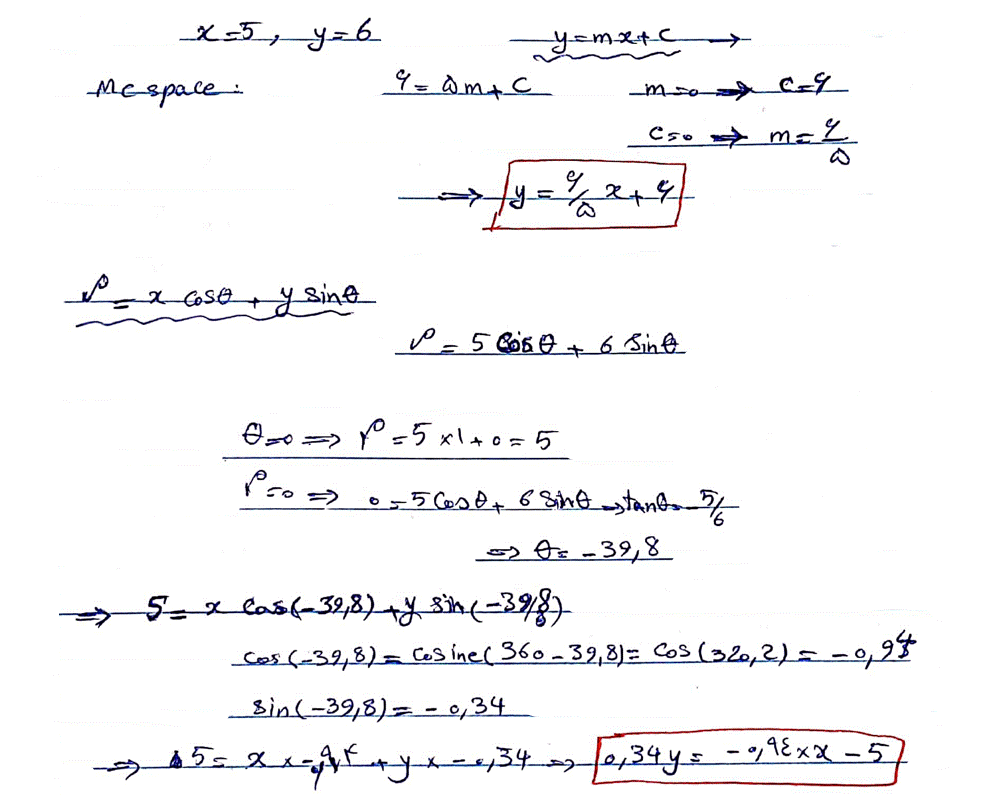

### Question2 :

In [ ]:
img_Base = cv2.imread('media/a.jpg', -1)
img = cv2.cvtColor(img_Base, cv2.COLOR_BGR2RGB)
show_img_plt(img)

In [ ]:
gray_img = cv2.cvtColor(img_Base, cv2.COLOR_BGR2GRAY)
denoised_gray_circle_img = cv2.medianBlur(gray_img, 3)
ret, thresh = cv2.threshold(denoised_gray_circle_img, 200, 255, cv2.THRESH_BINARY)

edges = cv2.Canny(gray_img, 100, 150, 3)
show_img_plt(edges)

In [4]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 200 )

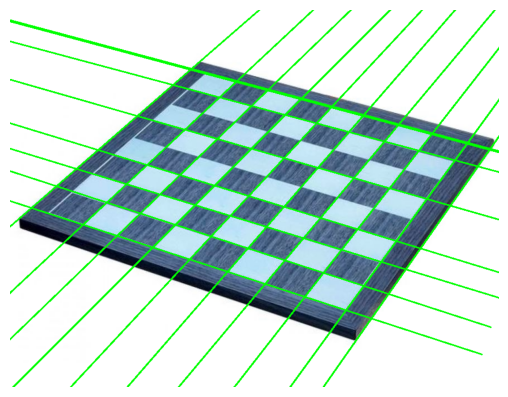

In [5]:
l = 1000

for line in lines:
    rho, theta = line[0]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = rho * a
    y0 = rho * b
    
    x1 = int(x0 + l *(-b))
    y1 = int(y0 + l * (a))
    
    x2 = int(x0 - l *(-b))
    y2 = int(y0 - l * a)
    
    cv2.line(img_Base, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
show_img_plt(img_Base)

In [ ]:
# Load the image
img = cv2.imread('media/a.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 150)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=200, minLineLength=100, maxLineGap=10)

# Draw the detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_Base, (x1, y1), (x2, y2), (0, 255, 0), 2)

show_img_plt(img_Base)

### Question3 :

In [ ]:
#Hough Circles
circle_img_Base = cv2.imread('media/b.jpg', -1)
C_img = cv2.cvtColor(circle_img_Base, cv2.COLOR_BGR2RGB)

show_img_plt(C_img)

In [ ]:
gray_circle_img = cv2.cvtColor(circle_img_Base, cv2.COLOR_BGR2GRAY)
show_img_plt(gray_circle_img)


In [ ]:
denoised_gray_circle_img = cv2.medianBlur(gray_circle_img, 5)

row = gray.shape[0]
 
show_img_plt(denoised_gray_circle_img)

In [10]:
# apply threshold to isolate pixels with intensity greater than 120
ret, thresh = cv2.threshold(denoised_gray_circle_img, 120, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

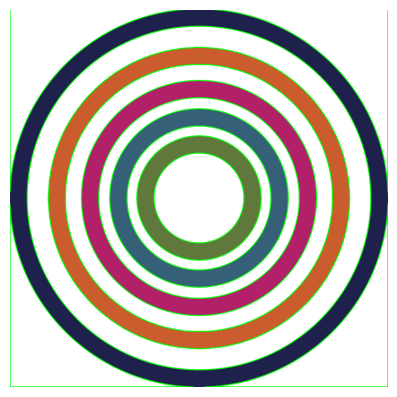

In [11]:

img3 = cv2.drawContours(C_img, contours, -1, (0, 255, 0), 5)
show_img_plt(img3)


### Question4 :

In [12]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 


def show_img_plt(img, axisoff='on', c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)
    plt.axis('off')


vid = cv2.VideoCapture('media/lane.mp4') 


In [13]:
cnt = 0 

while cnt < 8:
    if cnt == 7:
        cv2.imwrite(f'media/frame_{cnt+1}.jpg', frame)

        
    ret, frame = vid.read()
    
    if not ret:
        vid = cv2.VideoCapture('image/lanes.mp4')
        continue
         
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    
    cnt += 1
    #print(cnt)
    
vid.release()
cv2.destroyAllWindows()


In [ ]:
img = cv2.imread('media/frame_8.jpg', -1)
img_Base = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.imread('media/frame_8.jpg', 0)

show_img_plt(img_Base) 

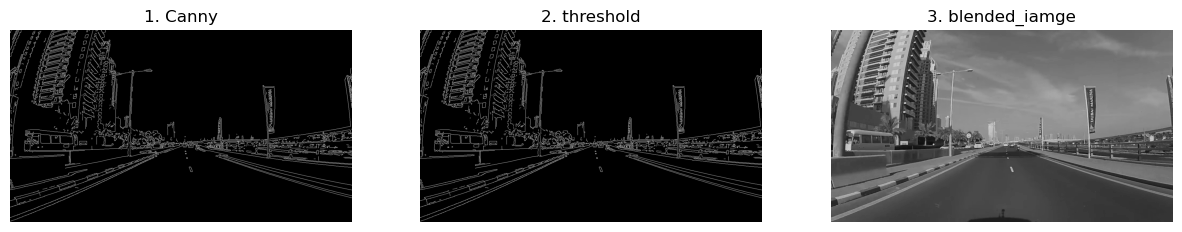

In [15]:
denoised_frame = cv2.GaussianBlur(gray_img , (5,5), 0) 
canny_denoised_frame = cv2.Canny(denoised_frame, 120, 150)
     
ret, thresh = cv2.threshold(canny_denoised_frame, 210, 255, cv2.THRESH_BINARY)
 
blended = cv2.addWeighted(gray_img, 0.8, thresh, 0.2, 0)

show_multi_img(1, 3, (canny_denoised_frame, thresh, blended), titles=['Canny','threshold','blended_iamge'])  


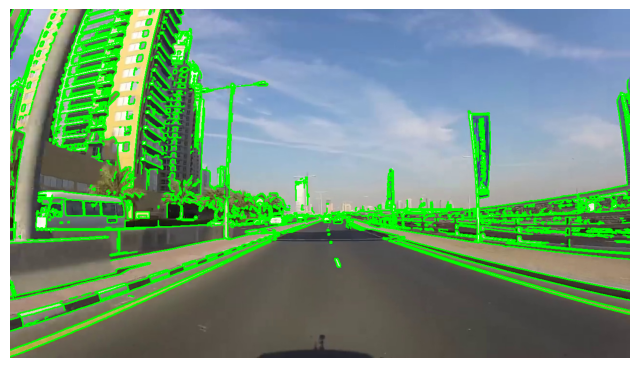

In [16]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img1 = cv2.imread('media/frame_8.jpg', -1)
img_Base1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_Contour = cv2.drawContours(img_Base1, contours, -1, (0, 255, 0), 2)
show_img_plt(img_Contour)